In [1]:
import sys
import os
sys.path.append(os.path.abspath("../"))  # or "../../" depending on location
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [16]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from utils.load_models import set_device, get_CNN,get_CNN_small,get_resnet
from utils.evaluate_uap_functions import *

# ==========================
# 前処理（ToTensorのみ＋別でnormalize関数を適用）
# ==========================

transform = transforms.ToTensor()

# ==========================
# テストデータ読み込み
# ==========================
test_dataset = datasets.CIFAR10(root="../data", train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)



device = set_device()
# ==========================
# UAP読み込み
# ==========================

uap_paths = {
    "CNN": "../attacks/local_uap/local_uap_delta_CNN.pt",
    "CNN_small": "../attacks/local_uap/local_uap_delta_CNN_small.pt",
    "CNN_withConfidencePenalty": "../attacks/local_uap/local_uap_delta_CNN_withConfidencePenalty.pt",
    "CNN_small_withConfidencePenalty": "../attacks/local_uap/local_uap_delta_CNN_small_withConfidencePenalty.pt",
    "CNN_withEntropy": "../attacks/local_uap/local_uap_delta_CNN_withEntropy.pt",
    "CNN_small_withEntropy": "../attacks/local_uap/local_uap_delta_CNN_small_withEntropy.pt",
    "ResNet_withEntropy": "../attacks/local_uap/local_uap_delta_ResNet_withEntropy.pt",  # optional
}

uap_path = uap_paths["CNN_small_withEntropy"]  #任意のものに変更
delta = torch.load(uap_path, map_location=device)
mask = generate_mask((8, 8)).unsqueeze(0)  # shape: [1, 3, 32, 32]

/var/folders/k3/b1t1gjg12pg0ycfdgpm2k7g00000gn/T/ipykernel_4583/4196903223.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  delta = torch.load(uap_path, map_location=dev

In [17]:
# ==========================
# 評価実行
# ==========================
cnn = get_CNN()
cnn = cnn.to(device)
display(evaluate_uap(cnn, test_loader, delta=delta,device=device,model_name="CNN"))





/Users/yamashitanatsuki/Documents/Python/portfolio_adverasrial_example/utils/load_models.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load

,Model,Attack,Original Accuracy (%),Adversarial Accuracy (%),Accuracy Drop (%)
0,CNN,UAP,79.94,49.73,30.21


In [18]:
resnet = get_resnet()
resnet = resnet.to(device)
resnet.eval()
display(evaluate_uap(resnet, test_loader, delta=delta,device=device,model_name="ResNet18"))


/Users/yamashitanatsuki/Documents/Python/portfolio_adverasrial_example/utils/load_models.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.loa

,Model,Attack,Original Accuracy (%),Adversarial Accuracy (%),Accuracy Drop (%)
0,ResNet18,UAP,88.09,80.38,7.71


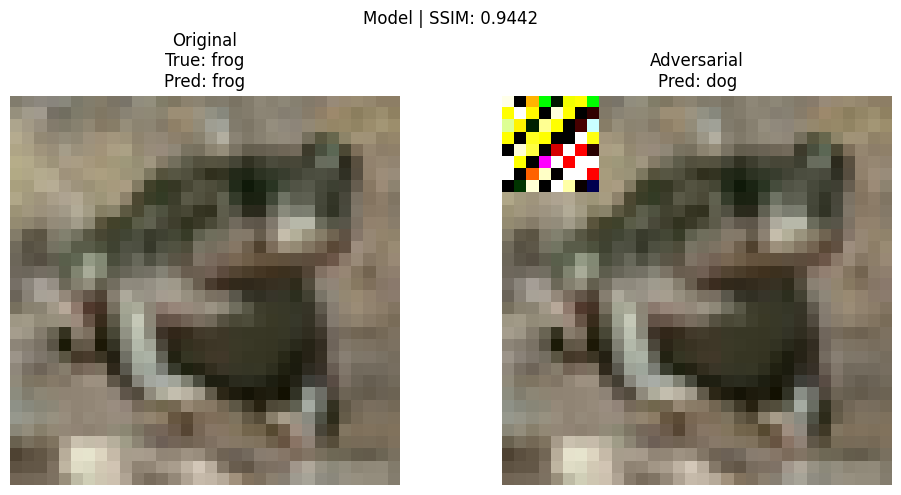

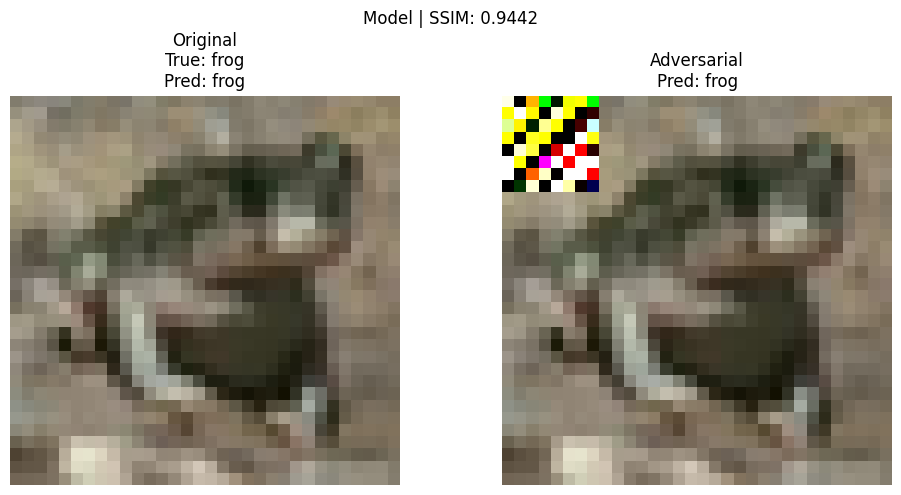

In [19]:
index = 64
visualize_uap_effect(cnn,delta,test_dataset,index=index,device=device)
visualize_uap_effect(resnet,delta,test_dataset,index=index,device=device)